In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# macOS용 한글 폰트 설정

# macOS에서 사용 가능한 한글 폰트들
macos_korean_fonts = [
    '/System/Library/Fonts/AppleGothic.ttf',
    '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    '/Library/Fonts/NanumGothic.ttf',
    '/Library/Fonts/NanumBarunGothic.ttf',
    '/System/Library/Fonts/PingFang.ttc'
]

# 사용 가능한 폰트 찾기
available_font = None
for font_path in macos_korean_fonts:
    if os.path.exists(font_path):
        available_font = font_path
        print(f"사용 가능한 폰트 발견: {font_path}")
        break

if available_font:
    # 폰트 설정
    font_prop = fm.FontProperties(fname=available_font)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print(f"폰트 설정 완료: {font_prop.get_name()}")
else:
    # 기본 폰트로 설정
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 AppleGothic 폰트 사용")

사용 가능한 폰트 발견: /System/Library/Fonts/AppleSDGothicNeo.ttc
폰트 설정 완료: Apple SD Gothic Neo


In [3]:
# 데이터 로드
print("포천시 2024년 전체 카드 데이터 로드 중...")
df = pd.read_csv('../01_data_analysis/데이터_전처리후/6_카드데이터/pocheon_card_data_2024_full.csv')

print(f"데이터 크기: {df.shape}")
print(f"컬럼 수: {len(df.columns)}")
print(f"행 수: {len(df):,}개")

# 기본 정보 확인
print("\n=== 데이터 기본 정보 ===")
print(df.info())

print("\n=== 첫 5행 확인 ===")
print(df.head())

print("\n=== 컬럼명 확인 ===")
print(df.columns.tolist())

포천시 2024년 전체 카드 데이터 로드 중...
데이터 크기: (4827128, 16)
컬럼 수: 16
행 수: 4,827,128개

=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4827128 entries, 0 to 4827127
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   year             int64 
 1   month            int64 
 2   day              int64 
 3   cty_rgn_no       int64 
 4   cty_rgn_nm       object
 5   admi_cty_no      int64 
 6   admi_cty_nm      object
 7   card_tpbuz_cd    object
 8   card_tpbuz_nm_1  object
 9   card_tpbuz_nm_2  object
 10  hour             int64 
 11  sex              object
 12  age              int64 
 13  week             int64 
 14  amt              int64 
 15  cnt              int64 
dtypes: int64(10), object(6)
memory usage: 589.2+ MB
None

=== 첫 5행 확인 ===
   year  month  day  cty_rgn_no cty_rgn_nm  admi_cty_no admi_cty_nm  \
0  2024      1    1       41650        포천시     41650250         소흘읍   
1  2024      1    1       41650        포천시     4165025

In [4]:
# 데이터 전처리
print("\n=== 데이터 전처리 ===")

# 날짜 컬럼 생성
df['DATE'] = pd.to_datetime(df[['year', 'month', 'day']])

# 행정동별 데이터 확인
print(f"\n포천시 행정동 목록: {df['admi_cty_nm'].unique()}")

# 시간대별 분석
print(f"\n시간대 목록: {sorted(df['hour'].unique())}")



=== 데이터 전처리 ===

포천시 행정동 목록: ['소흘읍' '군내면' '내촌면' '가산면' '신북면' '창수면' '영중면' '일동면' '이동면' '영북면' '관인면' '화현면'
 '포천동' '선단동']

시간대 목록: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



=== 1. 행정동별 총 거래액 분석 ===
admi_cty_nm
소흘읍    507363222793
포천동    184165790827
선단동    172420773379
일동면    138908284311
내촌면    136398484285
신북면    134034605865
가산면    112814667644
영중면     98668737878
군내면     92673725831
영북면     90735168724
이동면     78899867950
화현면     56154804951
관인면     12580765250
창수면      6786595911
Name: amt, dtype: int64


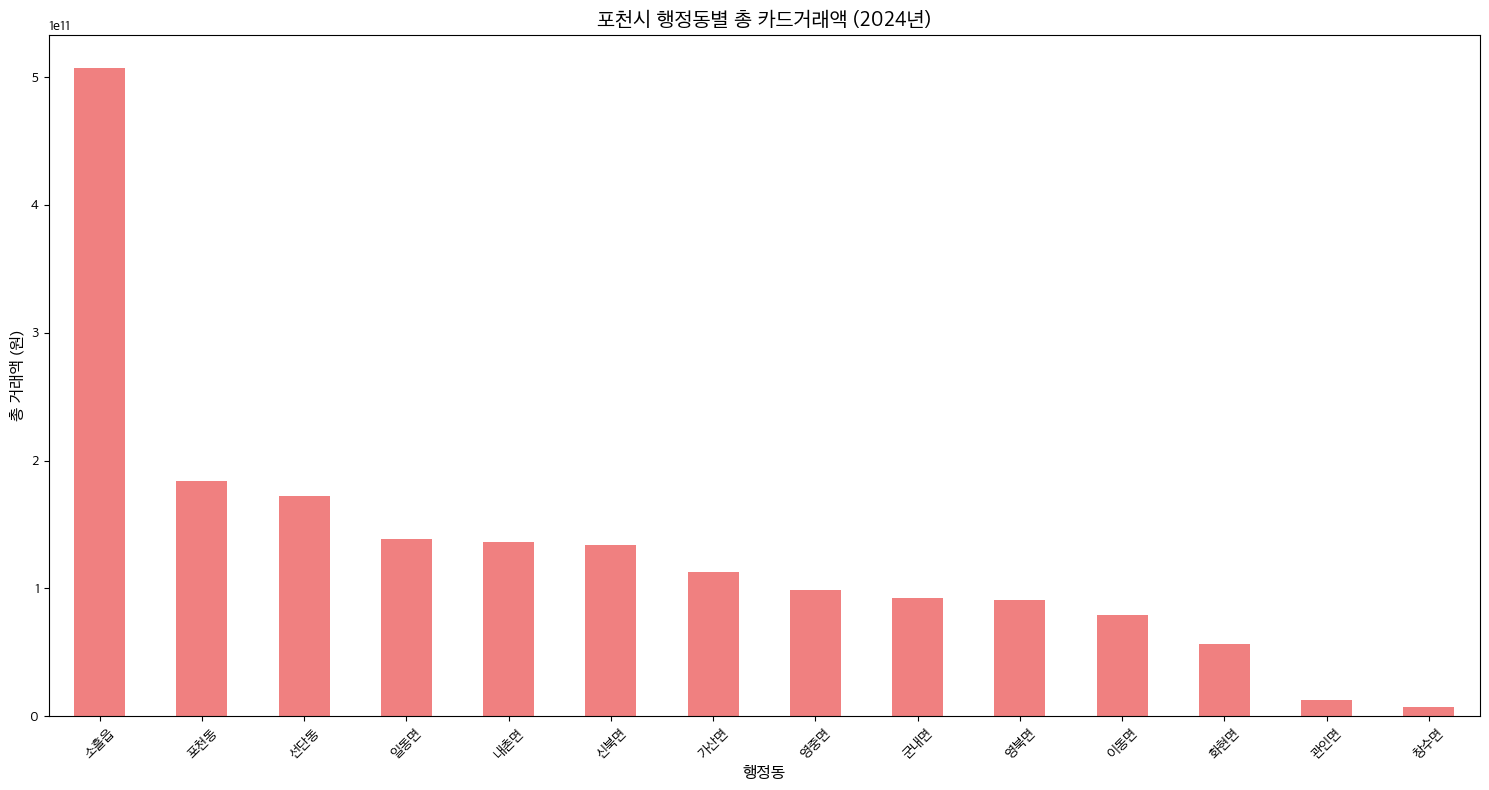

In [5]:
# 1. 행정동별 총 거래액 분석
print("\n=== 1. 행정동별 총 거래액 분석 ===")
area_amount = df.groupby('admi_cty_nm')['amt'].sum().sort_values(ascending=False)
print(area_amount)

plt.figure(figsize=(15, 8))
area_amount.plot(kind='bar', color='lightcoral')
plt.title('포천시 행정동별 총 카드거래액 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('행정동', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== 2. 월별 거래액 트렌드 분석 ===
month
1     124242373274
2     124273276862
3     152836935886
4     158839985418
5     168403422396
6     158480976955
7     147486945805
8     167318397764
9     162623416217
10    169552529434
11    156506037627
12    132041197961
Name: amt, dtype: int64


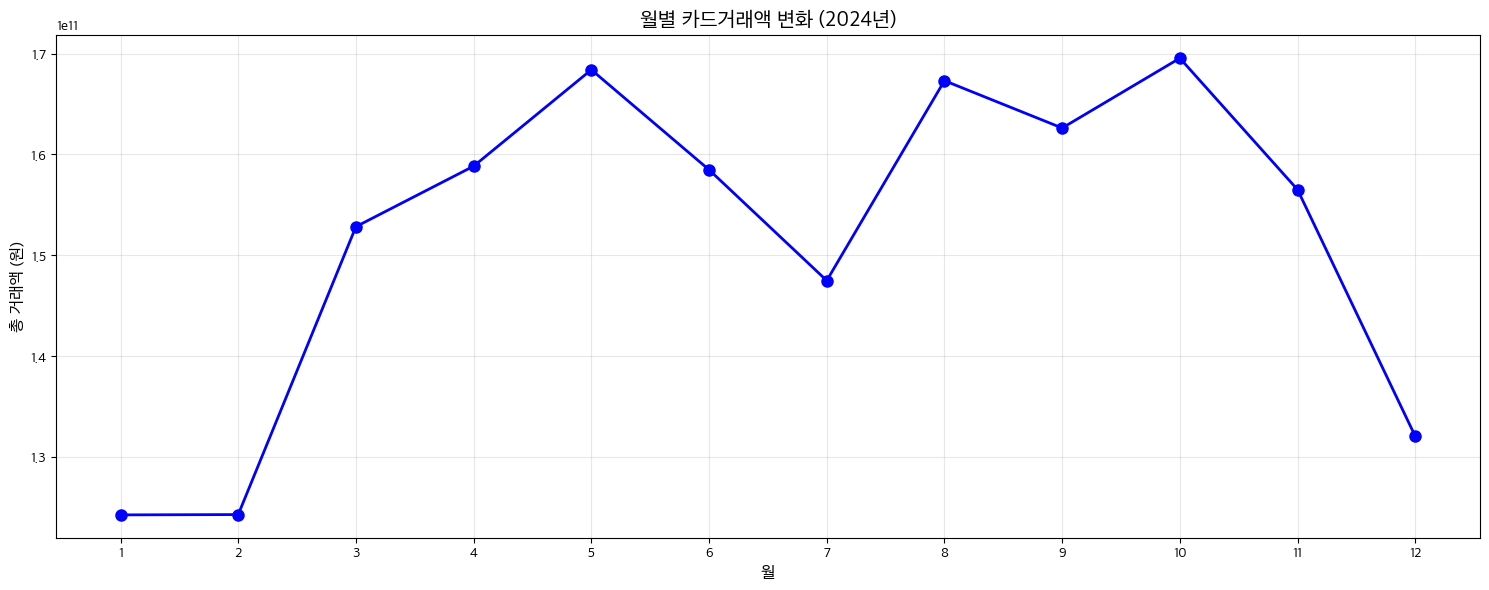

In [6]:
# 2. 월별 거래액 트렌드 분석
print("\n=== 2. 월별 거래액 트렌드 분석 ===")
monthly_amount = df.groupby('month')['amt'].sum()
print(monthly_amount)

plt.figure(figsize=(15, 6))
monthly_amount.plot(kind='line', marker='o', linewidth=2, markersize=8, color='blue')
plt.title('월별 카드거래액 변화 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


=== 3. 시간대별 거래액 분석 ===
hour
1      54728946115
2      80202899916
3     179373632499
4     324230948936
5     337427536216
6     289453865796
7     297763303665
8     186264302306
9      59795678295
10     13364381855
Name: amt, dtype: int64


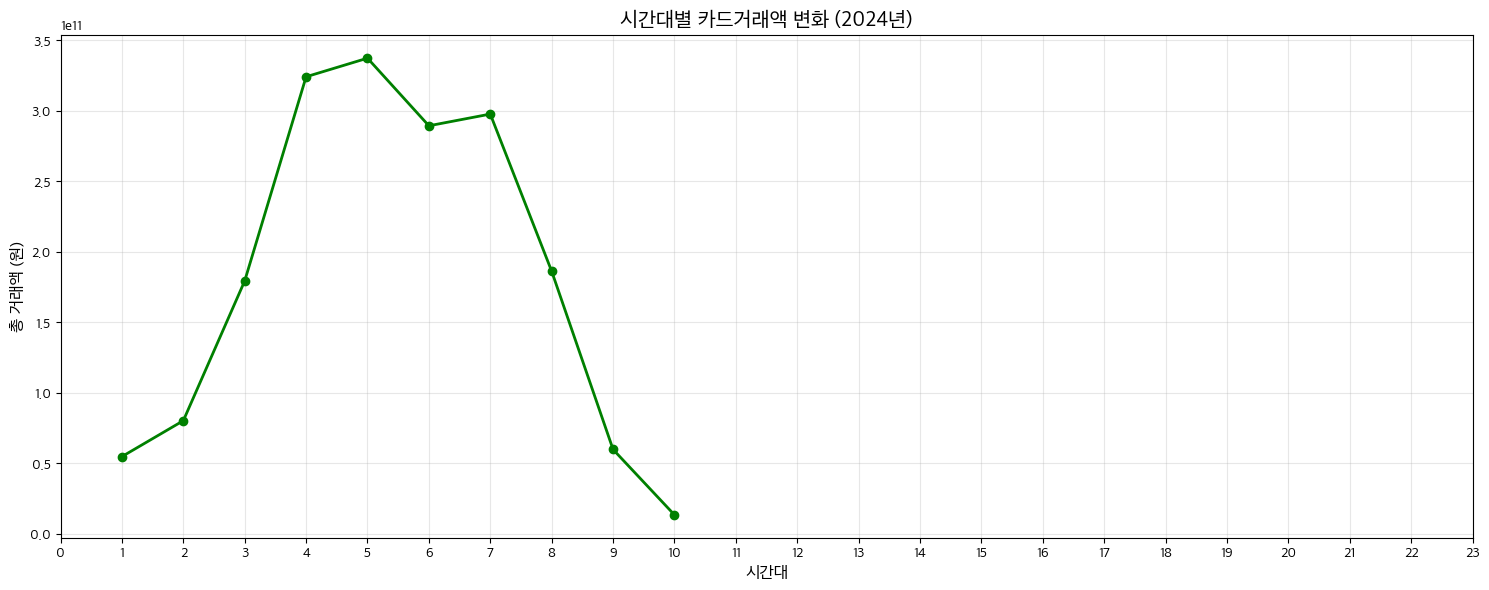

In [7]:
# 3. 시간대별 거래액 분석
print("\n=== 3. 시간대별 거래액 분석 ===")
time_amount = df.groupby('hour')['amt'].sum()
print(time_amount)

plt.figure(figsize=(15, 6))
time_amount.plot(kind='line', marker='o', linewidth=2, markersize=6, color='green')
plt.title('시간대별 카드거래액 변화 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('시간대', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


=== 4. 업종별 분석 ===
card_tpbuz_nm_1
소매/유통       749086569234
생활서비스       412251800121
음식          376288669527
여가/오락       105208446556
의료/건강        98468639276
공공/기업/단체     38808481529
학문/교육        25732383356
미디어/통신       16454819040
공연/전시          305686960
Name: amt, dtype: int64


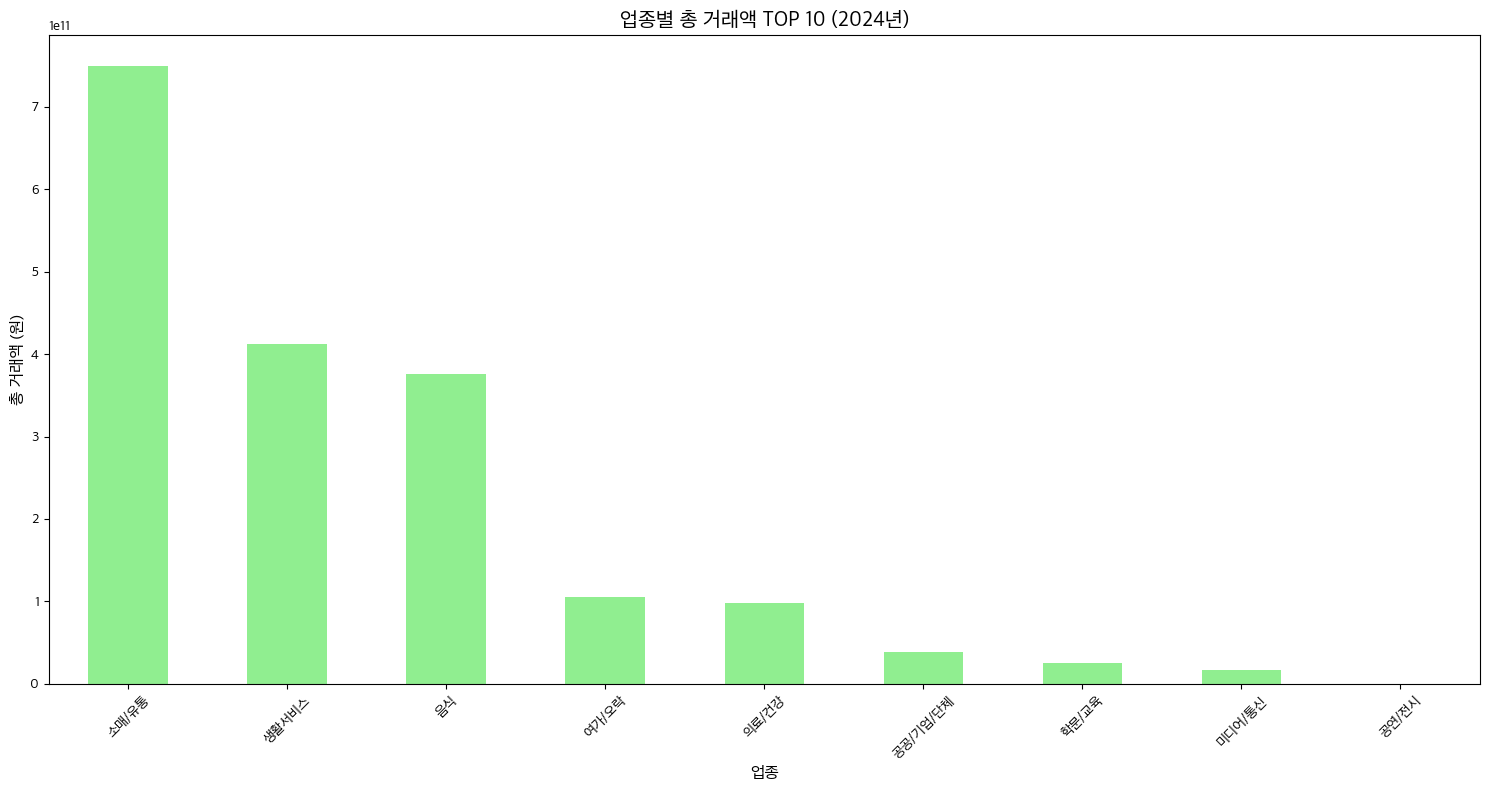

In [8]:
# 4. 업종별 분석
print("\n=== 4. 업종별 분석 ===")
business_amount = df.groupby('card_tpbuz_nm_1')['amt'].sum().sort_values(ascending=False)
print(business_amount.head(10))

plt.figure(figsize=(15, 8))
business_amount.head(10).plot(kind='bar', color='lightgreen')
plt.title('업종별 총 거래액 TOP 10 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('업종', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== 5. 성별 분석 ===
sex
F     642766952000
M    1179838543599
Name: amt, dtype: int64


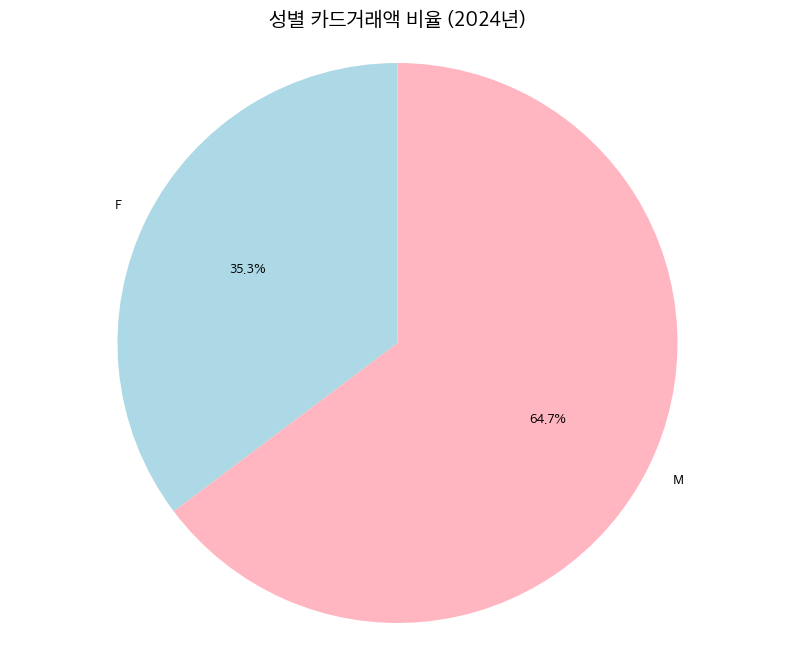

남성: 1,179,838,543,599원 (64.7%)
여성: 642,766,952,000원 (35.3%)


In [9]:
# 5. 성별 분석
print("\n=== 5. 성별 분석 ===")
gender_amount = df.groupby('sex')['amt'].sum()
print(gender_amount)

plt.figure(figsize=(10, 8))
plt.pie(gender_amount.values, labels=gender_amount.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightpink'], startangle=90)
plt.title('성별 카드거래액 비율 (2024년)', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()

print(f"남성: {gender_amount.get('M', 0):,.0f}원 ({gender_amount.get('M', 0)/gender_amount.sum()*100:.1f}%)")
print(f"여성: {gender_amount.get('F', 0):,.0f}원 ({gender_amount.get('F', 0)/gender_amount.sum()*100:.1f}%)")



=== 6. 연령대별 분석 ===
age
1         32659997
2       1715398150
3     135657664853
4     253039729345
5     390235057627
6     539149313469
7     388692689748
8      97024004947
9      16534079903
10       512634855
11        12262705
Name: amt, dtype: int64


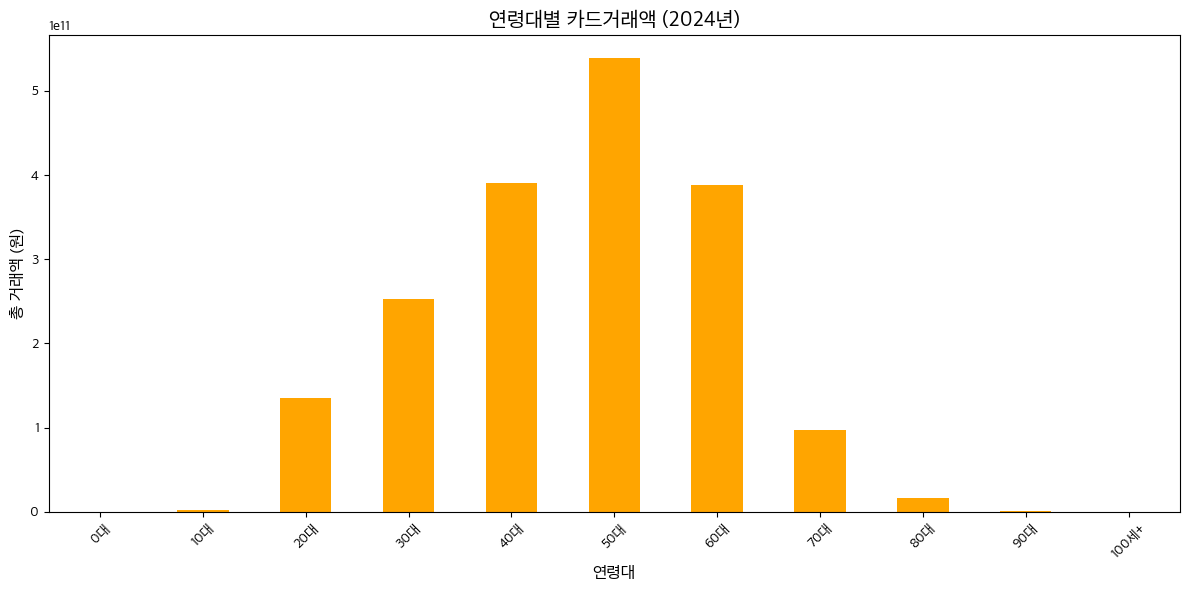


연령대별 상세 통계:
0대: 32,659,997원
10대: 1,715,398,150원
20대: 135,657,664,853원
30대: 253,039,729,345원
40대: 390,235,057,627원
50대: 539,149,313,469원
60대: 388,692,689,748원
70대: 97,024,004,947원
80대: 16,534,079,903원
90대: 512,634,855원
100세+: 12,262,705원


In [10]:
# 6. 연령대별 분석
print("\n=== 6. 연령대별 분석 ===")
age_amount = df.groupby('age')['amt'].sum().sort_index()
print(age_amount)

# 연령대 코드를 실제 나이 범위로 매핑
age_mapping = {
    1: '0대',   # 0~9세
    2: '10대',  # 10~19세
    3: '20대',  # 20~29세
    4: '30대',  # 30~39세
    5: '40대',  # 40~49세
    6: '50대',  # 50~59세
    7: '60대',  # 60~69세
    8: '70대',  # 70~79세
    9: '80대',  # 80~89세
    10: '90대', # 90~99세
    11: '100세+'# 100세 이상
}

# 연령대별 거래액을 실제 나이 범위로 변환
age_amount_labeled = age_amount.rename(index=age_mapping)

plt.figure(figsize=(12, 6))
age_amount_labeled.plot(kind='bar', color='orange')
plt.title('연령대별 카드거래액 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 연령대별 상세 통계 출력
print("\n연령대별 상세 통계:")
for age_code, age_label in age_mapping.items():
    if age_code in age_amount.index:
        amount = age_amount[age_code]
        print(f"{age_label}: {amount:,.0f}원")


=== 7. 요일별 분석 ===
week
1    249023135449
2    247087604261
3    239191423458
4    249524528657
5    276560051467
6    312871276548
7    248347475759
Name: amt, dtype: int64


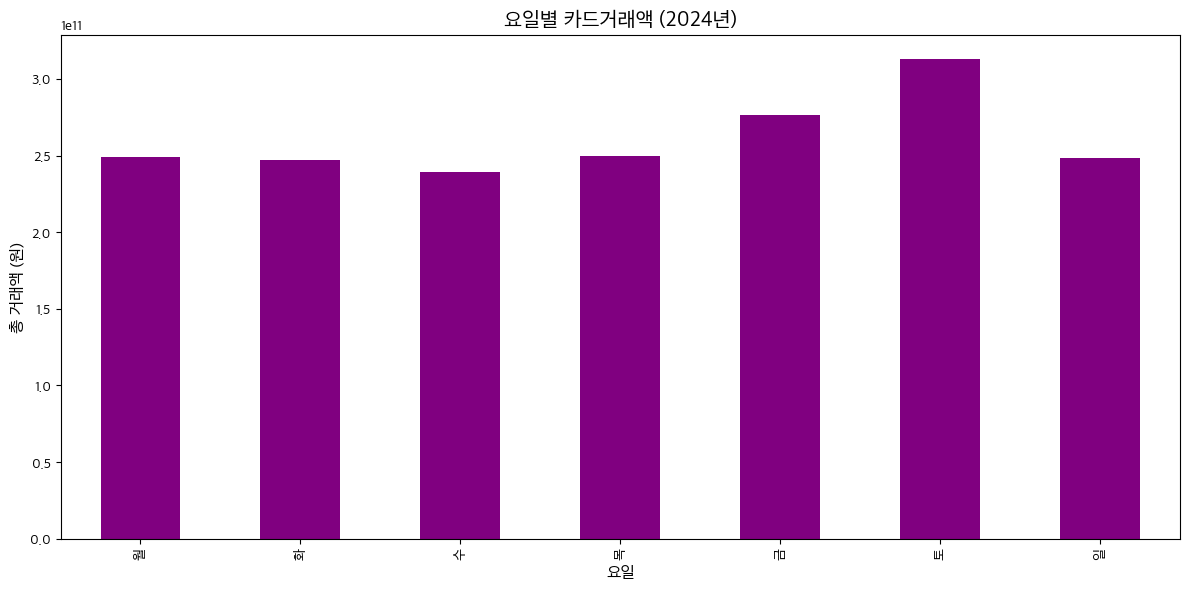

In [11]:
# 7. 요일별 분석
print("\n=== 7. 요일별 분석 ===")
weekday_amount = df.groupby('week')['amt'].sum()
weekday_order = [1, 2, 3, 4, 5, 6, 7]  # 월~일
weekday_amount = weekday_amount.reindex(weekday_order)

weekday_names = ['월', '화', '수', '목', '금', '토', '일']
print(weekday_amount)

plt.figure(figsize=(12, 6))
weekday_amount.plot(kind='bar', color='purple')
plt.title('요일별 카드거래액 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('요일', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.xticks(range(7), weekday_names)
plt.tight_layout()
plt.show()


=== 8. 월별 요일별 거래액 히트맵 ===


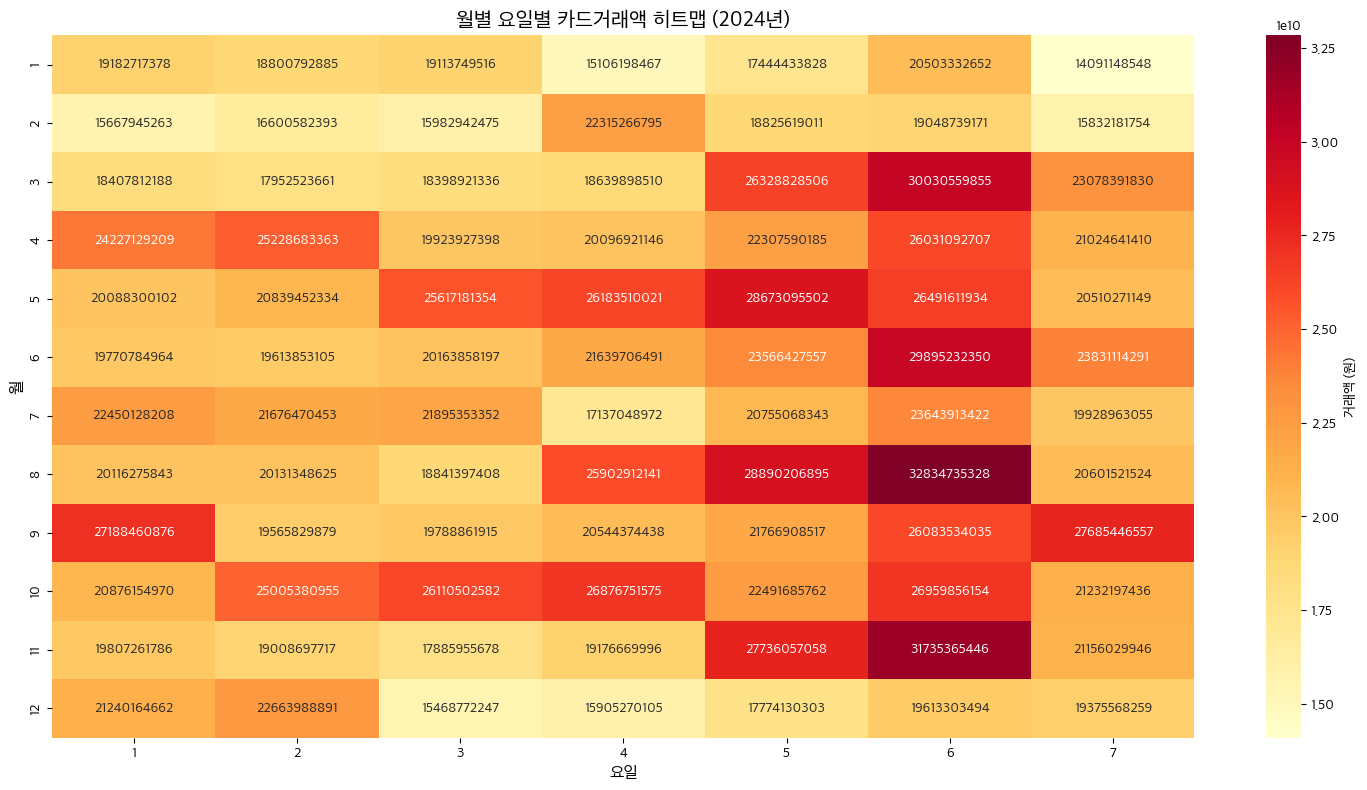

In [12]:
# 8. 월별 요일별 히트맵
print("\n=== 8. 월별 요일별 거래액 히트맵 ===")
month_week_heatmap = df.groupby(['month', 'week'])['amt'].sum().unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(month_week_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': '거래액 (원)'})
plt.title('월별 요일별 카드거래액 히트맵 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('요일', fontsize=12)
plt.ylabel('월', fontsize=12)
plt.tight_layout()
plt.show()


=== 9. 행정동별 시간대별 거래액 히트맵 ===


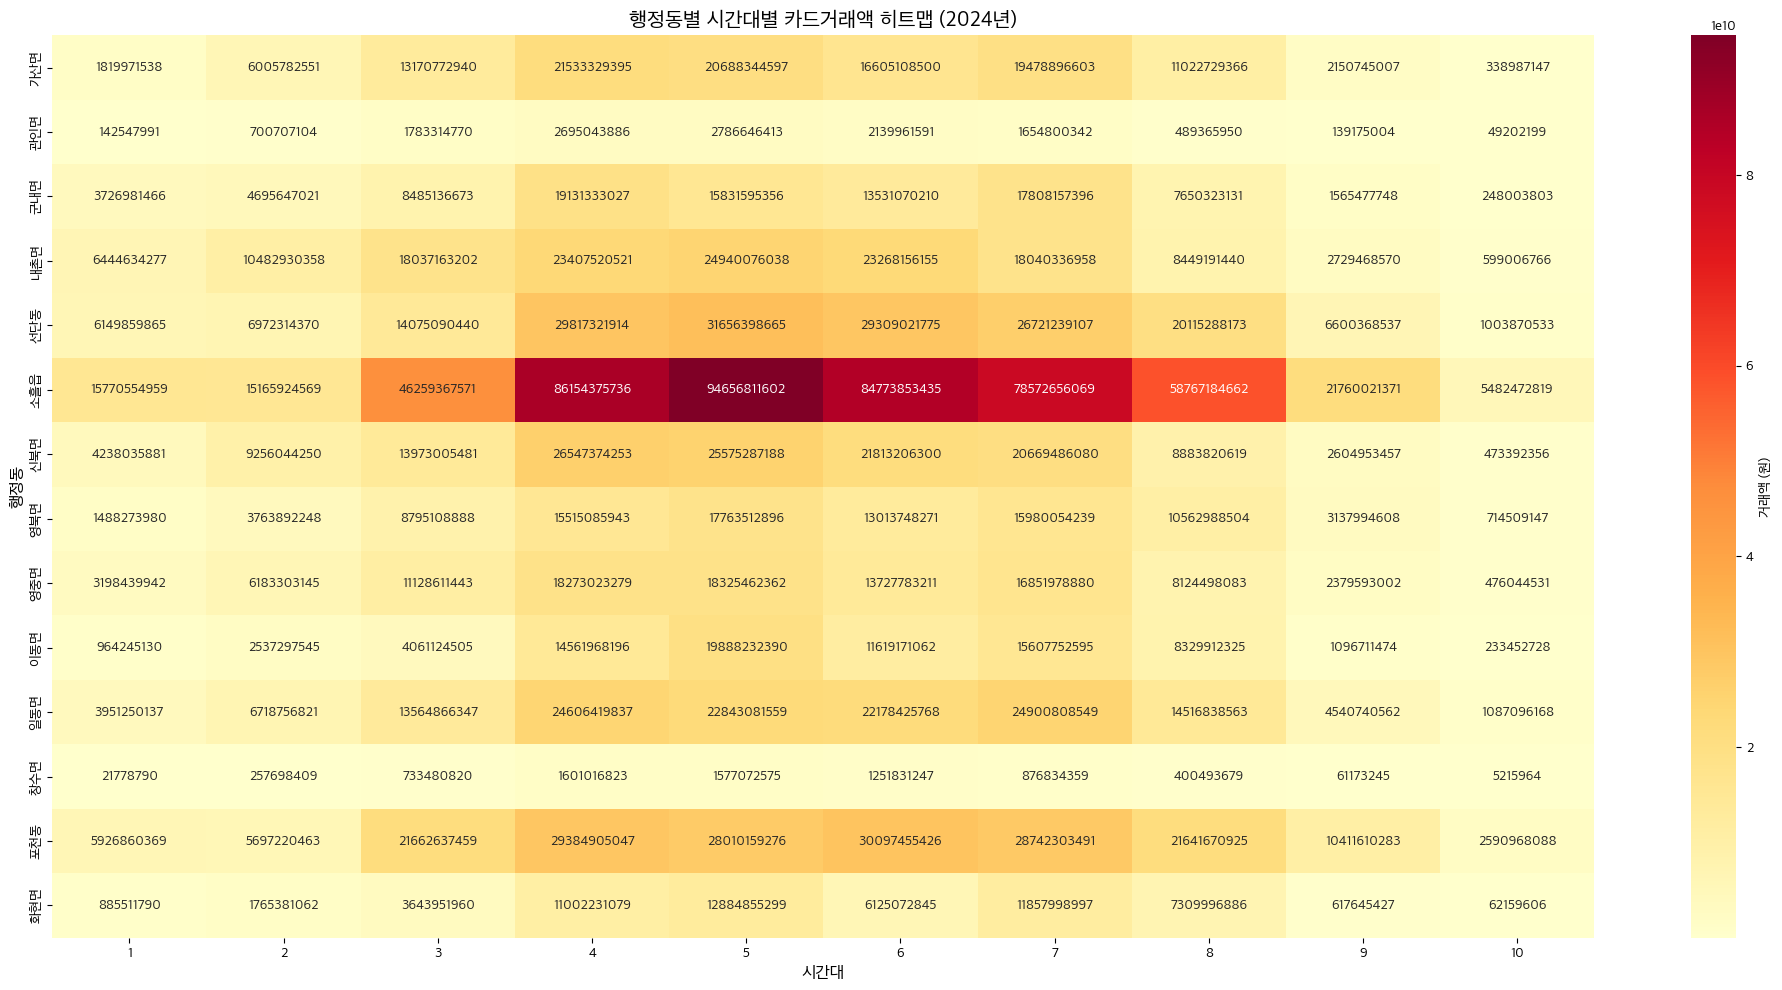

In [13]:
# 9. 행정동별 시간대별 히트맵
print("\n=== 9. 행정동별 시간대별 거래액 히트맵 ===")
area_time_heatmap = df.groupby(['admi_cty_nm', 'hour'])['amt'].sum().unstack()

plt.figure(figsize=(20, 10))
sns.heatmap(area_time_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': '거래액 (원)'})
plt.title('행정동별 시간대별 카드거래액 히트맵 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('시간대', fontsize=12)
plt.ylabel('행정동', fontsize=12)
plt.tight_layout()
plt.show()


=== 10. 거래건수 분석 ===
admi_cty_nm
소흘읍    14732907
포천동     6057958
선단동     5213589
일동면     3784603
신북면     3557698
내촌면     2900410
영북면     2780761
영중면     2514020
가산면     2462462
군내면     1940738
이동면     1413131
화현면      817420
관인면      333170
창수면      175032
Name: cnt, dtype: int64


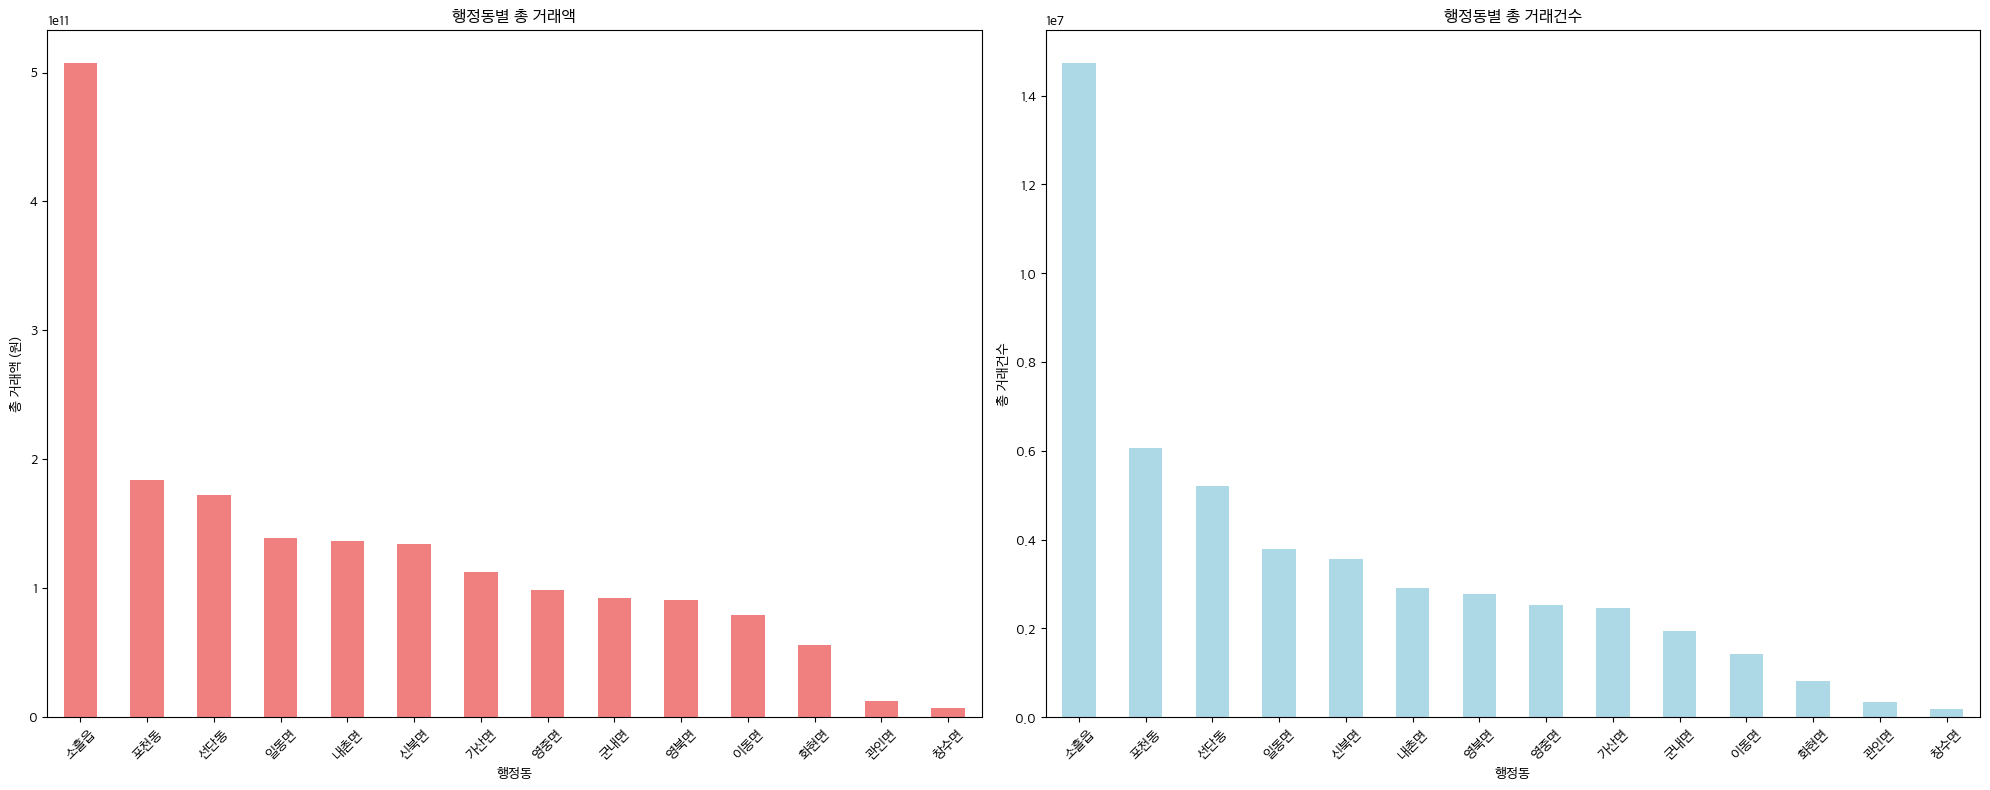

In [14]:
# 10. 거래건수 분석
print("\n=== 10. 거래건수 분석 ===")
area_count = df.groupby('admi_cty_nm')['cnt'].sum().sort_values(ascending=False)
print(area_count)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 거래액
area_amount.plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('행정동별 총 거래액', fontsize=12, fontweight='bold')
ax1.set_xlabel('행정동')
ax1.set_ylabel('총 거래액 (원)')
ax1.tick_params(axis='x', rotation=45)

# 거래건수
area_count.plot(kind='bar', ax=ax2, color='lightblue')
ax2.set_title('행정동별 총 거래건수', fontsize=12, fontweight='bold')
ax2.set_xlabel('행정동')
ax2.set_ylabel('총 거래건수')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== 11. 월별 거래액과 거래건수 비교 ===
                amt      cnt
month                       
1      124242373274  3711311
2      124273276862  3634841
3      152836935886  4011909
4      158839985418  4164109
5      168403422396  4345362
6      158480976955  4234706
7      147486945805  3997121
8      167318397764  4491003
9      162623416217  4270797
10     169552529434  4381884
11     156506037627  3918764
12     132041197961  3522092


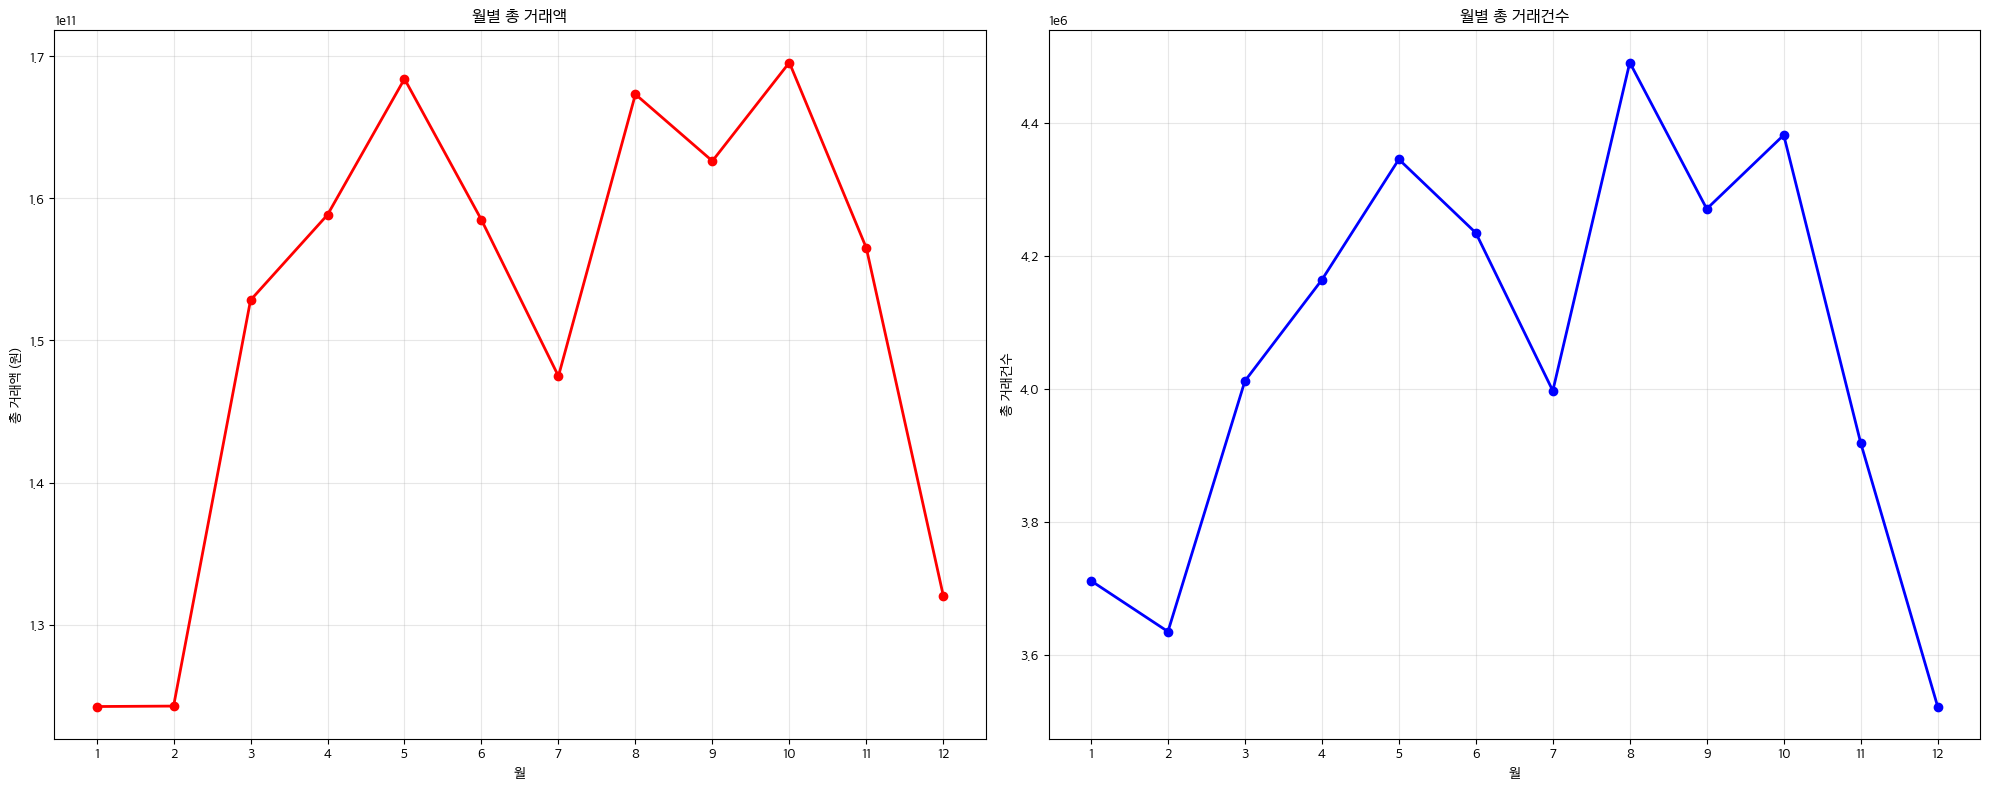

In [15]:
# 11. 월별 거래액과 거래건수 비교
print("\n=== 11. 월별 거래액과 거래건수 비교 ===")
monthly_stats = df.groupby('month').agg({
    'amt': 'sum',
    'cnt': 'sum'
}).round(2)
print(monthly_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 월별 거래액
monthly_stats['amt'].plot(kind='line', marker='o', ax=ax1, color='red', linewidth=2, markersize=6)
ax1.set_title('월별 총 거래액', fontsize=12, fontweight='bold')
ax1.set_xlabel('월')
ax1.set_ylabel('총 거래액 (원)')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 13))

# 월별 거래건수
monthly_stats['cnt'].plot(kind='line', marker='o', ax=ax2, color='blue', linewidth=2, markersize=6)
ax2.set_title('월별 총 거래건수', fontsize=12, fontweight='bold')
ax2.set_xlabel('월')
ax2.set_ylabel('총 거래건수')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

In [16]:
# 12. 상세 통계
print("\n=== 12. 상세 통계 ===")
print(f"총 거래액: {df['amt'].sum():,.0f}원")
print(f"총 거래건수: {df['cnt'].sum():,.0f}건")
print(f"평균 거래액: {df['amt'].mean():,.0f}원")
print(f"평균 거래건수: {df['cnt'].mean():,.0f}건")
print(f"최대 거래액: {df['amt'].max():,.0f}원")
print(f"최소 거래액: {df['amt'].min():,.0f}원")



=== 12. 상세 통계 ===
총 거래액: 1,822,605,495,599원
총 거래건수: 48,683,899건
평균 거래액: 377,576원
평균 거래건수: 10건
최대 거래액: 190,702,531원
최소 거래액: 0원


In [17]:
# 13. 업종별 상세 분석
print("\n=== 13. 업종별 상세 분석 ===")
business_detail = df.groupby('card_tpbuz_nm_1').agg({
    'amt': ['sum', 'mean', 'count'],
    'cnt': 'sum'
}).round(2)
business_detail.columns = ['총거래액', '평균거래액', '거래횟수', '총거래건수']
business_detail = business_detail.sort_values('총거래액', ascending=False)
print(business_detail.head(10))


=== 13. 업종별 상세 분석 ===
                         총거래액      평균거래액     거래횟수     총거래건수
card_tpbuz_nm_1                                            
소매/유통            749086569234  496331.33  1509247  23990352
생활서비스            412251800121  621762.89   663037   6323965
음식               376288669527  205831.32  1828141  12514929
여가/오락            105208446556  374612.59   280846   1989634
의료/건강             98468639276  279671.33   352087   2752063
공공/기업/단체          38808481529  432546.24    89721    362744
학문/교육             25732383356  510360.64    50420    123498
미디어/통신            16454819040  336609.50    48884    614236
공연/전시               305686960   64422.96     4745     12478



=== 14. 연령대별 성별 분석 ===
sex             F             M
age                            
1             NaN  3.266000e+07
2    6.462106e+08  1.069188e+09
3    3.887895e+10  9.677872e+10
4    9.148870e+10  1.615510e+11
5    1.375700e+11  2.526650e+11
6    1.959927e+11  3.431567e+11
7    1.374136e+11  2.512791e+11
8    3.435345e+10  6.267056e+10
9    6.195056e+09  1.033902e+10
10   2.262867e+08  2.863481e+08
11   2.059221e+06  1.020348e+07


<Figure size 1500x800 with 0 Axes>

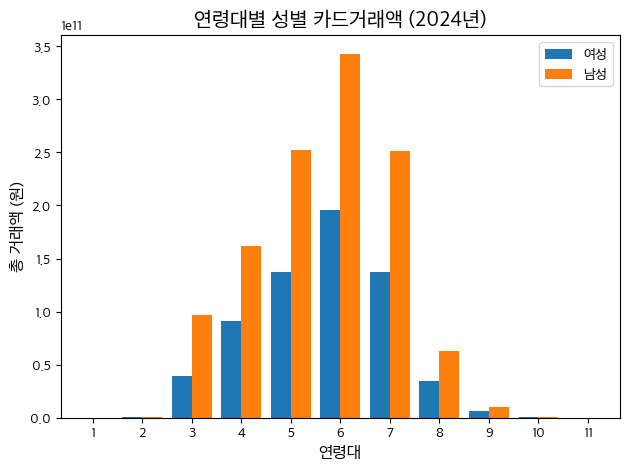

In [18]:
# 14. 연령대별 성별 분석
print("\n=== 14. 연령대별 성별 분석 ===")
age_gender_amount = df.groupby(['age', 'sex'])['amt'].sum().unstack()
print(age_gender_amount)

plt.figure(figsize=(15, 8))
age_gender_amount.plot(kind='bar', width=0.8)
plt.title('연령대별 성별 카드거래액 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.legend(['여성', '남성'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


=== 15. 계절별 분석 ===


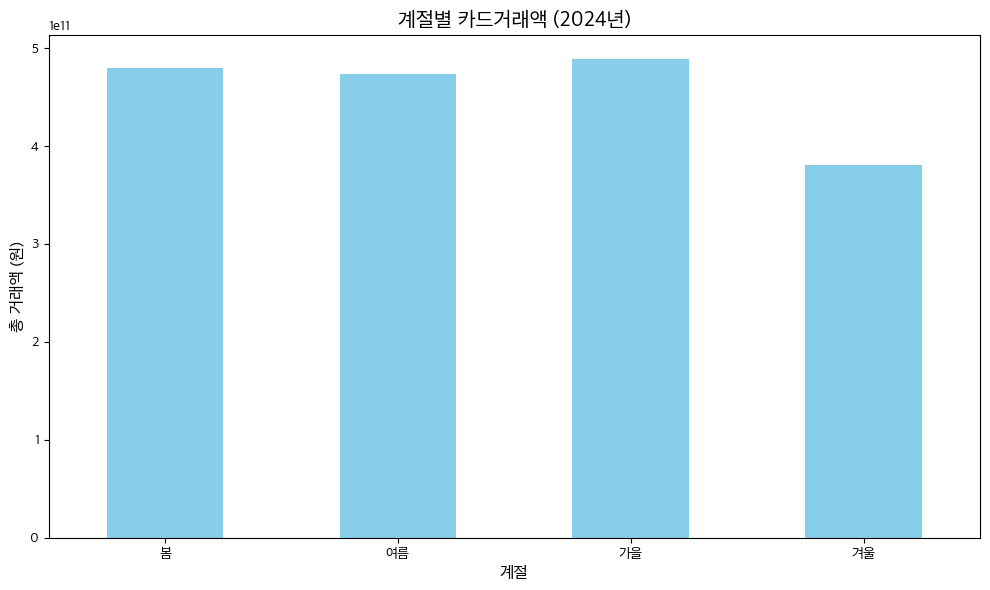

In [19]:
# 15. 계절별 분석
print("\n=== 15. 계절별 분석 ===")
df['season'] = df['month'].map({
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
})

season_amount = df.groupby('season')['amt'].sum()
season_order = ['봄', '여름', '가을', '겨울']
season_amount = season_amount.reindex(season_order)

plt.figure(figsize=(10, 6))
season_amount.plot(kind='bar', color='skyblue')
plt.title('계절별 카드거래액 (2024년)', fontsize=15, fontweight='bold')
plt.xlabel('계절', fontsize=12)
plt.ylabel('총 거래액 (원)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
print("\n=== 분석 완료 ===")
print("포천시 2024년 전체 카드 데이터 분석이 완료되었습니다.")

print("=== 분석 항목 요약 ===")
print("1. 행정동별 총 거래액 분석 - 포천시 내 각 행정동별로 전체 거래액을 집계하여 지역별 소비 규모를 파악합니다.")
print("2. 월별 거래액 트렌드 분석 - 2024년 월별로 전체 거래액의 변화를 시계열로 분석합니다.")
print("3. 시간대별 거래액 분석 - 하루 중 시간대별로 거래액 분포를 분석하여 주요 소비 시간대를 확인합니다.")
print("4. 업종별 분석 - 업종(소분류)별로 거래액을 집계하여 어떤 업종에서 소비가 많은지 분석합니다.")
print("5. 성별 분석 - 남성/여성별로 거래액을 집계하여 성별 소비 패턴을 비교합니다.")
print("6. 연령대별 분석 - 연령대별(10대~100세+) 거래액을 분석하여 주요 소비 연령층을 파악합니다.")
print("7. 요일별 분석 - 요일별로 거래액을 집계하여 주중/주말 소비 패턴을 분석합니다.")
print("8. 월별 요일별 거래액 히트맵 - 월별, 요일별로 거래액을 교차 분석하여 계절·요일별 소비 트렌드를 시각화합니다.")
print("9. 행정동별 시간대별 거래액 히트맵 - 행정동과 시간대별로 거래액을 교차 분석하여 지역·시간대별 소비 집중도를 시각화합니다.")
print("10. 거래건수 분석 - 전체 거래건수 및 월별, 업종별 거래건수 분포를 분석합니다.")
print("11. 월별 거래액과 거래건수 비교 - 월별 거래액과 거래건수의 추이를 함께 비교하여 소비 패턴을 입체적으로 분석합니다.")
print("12. 상세 통계 - 주요 변수(거래액, 건수 등)에 대한 평균, 중앙값, 표준편차 등 통계값을 제공합니다.")
print("13. 업종별 상세 분석 - 주요 업종별로 거래액, 건수, 성별·연령대별 분포 등 심층 분석을 수행합니다.")
print("14. 연령대별 성별 분석 - 연령대와 성별을 교차하여 세부 소비 패턴을 분석합니다.")
print("15. 계절별 분석 - 봄/여름/가을/겨울 등 계절별로 거래액 변화를 분석합니다.")
print("포천시 2024년 전체 카드 데이터 분석이 완료되었습니다.")


=== 분석 완료 ===
포천시 2024년 전체 카드 데이터 분석이 완료되었습니다.
=== 분석 항목 요약 ===
1. 행정동별 총 거래액 분석 - 포천시 내 각 행정동별로 전체 거래액을 집계하여 지역별 소비 규모를 파악합니다.
2. 월별 거래액 트렌드 분석 - 2024년 월별로 전체 거래액의 변화를 시계열로 분석합니다.
3. 시간대별 거래액 분석 - 하루 중 시간대별로 거래액 분포를 분석하여 주요 소비 시간대를 확인합니다.
4. 업종별 분석 - 업종(소분류)별로 거래액을 집계하여 어떤 업종에서 소비가 많은지 분석합니다.
5. 성별 분석 - 남성/여성별로 거래액을 집계하여 성별 소비 패턴을 비교합니다.
6. 연령대별 분석 - 연령대별(10대~100세+) 거래액을 분석하여 주요 소비 연령층을 파악합니다.
7. 요일별 분석 - 요일별로 거래액을 집계하여 주중/주말 소비 패턴을 분석합니다.
8. 월별 요일별 거래액 히트맵 - 월별, 요일별로 거래액을 교차 분석하여 계절·요일별 소비 트렌드를 시각화합니다.
9. 행정동별 시간대별 거래액 히트맵 - 행정동과 시간대별로 거래액을 교차 분석하여 지역·시간대별 소비 집중도를 시각화합니다.
10. 거래건수 분석 - 전체 거래건수 및 월별, 업종별 거래건수 분포를 분석합니다.
11. 월별 거래액과 거래건수 비교 - 월별 거래액과 거래건수의 추이를 함께 비교하여 소비 패턴을 입체적으로 분석합니다.
12. 상세 통계 - 주요 변수(거래액, 건수 등)에 대한 평균, 중앙값, 표준편차 등 통계값을 제공합니다.
13. 업종별 상세 분석 - 주요 업종별로 거래액, 건수, 성별·연령대별 분포 등 심층 분석을 수행합니다.
14. 연령대별 성별 분석 - 연령대와 성별을 교차하여 세부 소비 패턴을 분석합니다.
15. 계절별 분석 - 봄/여름/가을/겨울 등 계절별로 거래액 변화를 분석합니다.
포천시 2024년 전체 카드 데이터 분석이 완료되었습니다.
